In [1]:
%matplotlib inline
from pylab import *
import matplotlib.pyplot as plt

Initialisation
==============

* importing pyAgrum
* importing gumLib tools
* loading a BN

In [2]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
gnb.configuration()


Library,Version
OS,posix [linux]
Python,"3.4.2 (default, Oct 8 2014, 13:08:17) [GCC 4.9.1]"
IPython,3.0.0
MatPlotLib,1.4.3
Numpy,1.9.2
pyAgrum,0.9.0.9


In [3]:
bn=gum.loadBN("../resources/alarm.dsl")

Visualisation and inspection
============================

In [4]:
print(bn.variableFromName('SHUNT'))

SHUNT<NORMAL,HIGH>


In [5]:
print(bn.cpt(bn.idFromName('SHUNT')))

<SHUNT:NORMAL|PULMEMBOLUS:TRUE|INTUBATION:NORMAL> :: 0.1 /<SHUNT:HIGH|PULMEMBOLUS:TRUE|INTUBATION:NORMAL> :: 0.9 /<SHUNT:NORMAL|PULMEMBOLUS:FALSE|INTUBATION:NORMAL> :: 0.95 /<SHUNT:HIGH|PULMEMBOLUS:FALSE|INTUBATION:NORMAL> :: 0.05 /<SHUNT:NORMAL|PULMEMBOLUS:TRUE|INTUBATION:ESOPHAGEAL> :: 0.1 /<SHUNT:HIGH|PULMEMBOLUS:TRUE|INTUBATION:ESOPHAGEAL> :: 0.9 /<SHUNT:NORMAL|PULMEMBOLUS:FALSE|INTUBATION:ESOPHAGEAL> :: 0.95 /<SHUNT:HIGH|PULMEMBOLUS:FALSE|INTUBATION:ESOPHAGEAL> :: 0.05 /<SHUNT:NORMAL|PULMEMBOLUS:TRUE|INTUBATION:ONESIDED> :: 0.01 /<SHUNT:HIGH|PULMEMBOLUS:TRUE|INTUBATION:ONESIDED> :: 0.99 /<SHUNT:NORMAL|PULMEMBOLUS:FALSE|INTUBATION:ONESIDED> :: 0.05 /<SHUNT:HIGH|PULMEMBOLUS:FALSE|INTUBATION:ONESIDED> :: 0.95


In [6]:
from pyAgrum.lib.pretty_print import pretty_cpt
pretty_cpt(bn.cpt(bn.idFromName('SHUNT')))

                          |---------------|
--------------------------|     SHUNT     |
 PULMEMBOLUS | INTUBATION | NORMAL  HIGH  |
--------------------------|---------------|
    TRUE     |   NORMAL   | 0.1000 0.9000 |
    FALSE    |   NORMAL   | 0.9500 0.0500 |
    TRUE     | ESOPHAGEAL | 0.1000 0.9000 |
    FALSE    | ESOPHAGEAL | 0.9500 0.0500 |
    TRUE     |  ONESIDED  | 0.0100 0.9900 |
    FALSE    |  ONESIDED  | 0.0500 0.9500 |
--------------------------|---------------|


In [7]:
gnb.showBN(bn,size="7")

Results of inference
====================

It is easy to look at result of inference

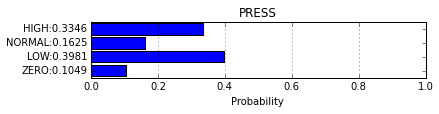

In [8]:
gnb.showPosterior(bn,{'SHUNT':'HIGH'},'PRESS')

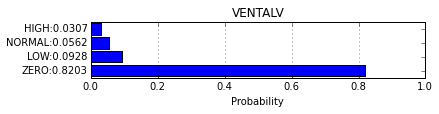

In [9]:
gnb.showPosterior(bn,{'MINVOLSET':'NORMAL'},'VENTALV')

Result of inferences
====================

It is also easy to use inference as a routine in more complex procedure.

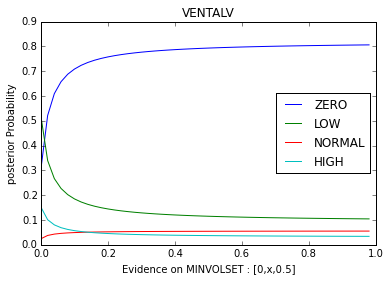

In [10]:
r=range(0,100,2)
xs=[x/100.0 for x in r]
ys=[gnb.getPosterior(bn,{'MINVOLSET':[0,x/100.0,0.5]},'VENTALV').tolist() 
        for x in r]
p=plot(xs,ys)
legend(p,[bn.variableFromName('VENTALV').label(i) 
          for i in range(bn.variableFromName('VENTALV').domainSize())],loc=7);
title('VENTALV');
ylabel('posterior Probability');
xlabel('Evidence on MINVOLSET : [0,x,0.5]');

Another example : python gives access to a large set of tools. Here the value for the equality of two probabilities of a posterior is easely computed.

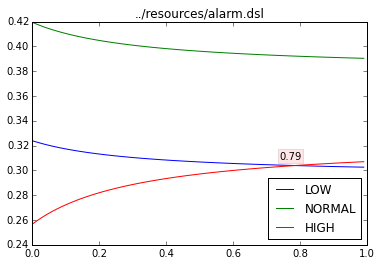

In [11]:
x=[p/100.0 for p in range(0,100)]
y=[gnb.getPosterior(bn,{'HRBP':[1.0-p/100.0,1.0-p/100.0,p/100.0]},'TPR').tolist() 
   for p in range(0,100)]
p=plot(x,y)
title(bn.property('name'));
v=bn.variableFromName('TPR');
legend([v.label(i) for i in range(v.domainSize())],loc='best');
np1=(transpose(y)[0]>transpose(y)[2]).argmin()
text(x[np1]-0.05,y[np1][0]+0.005,str(x[np1]),bbox=dict(facecolor='red', alpha=0.1));

BN as classifier
================

Generation of databases
-----------------------

Using CSV format for database,

In [15]:
from pyAgrum.lib.bn2csv import generateCSV

generateCSV(bn,"test.csv",1000,True)

SyntaxError: Missing parentheses in call to 'print' (progress_bar.py, line 92)

In [13]:
!head test.csv

BN as a classifier
------------------

(because of the use of from-bn-generated csv files, quite good ROC curves are expected)

test.csv : [ ################################################################ ] 100%
result in roc_alarm.dsl-test.csv-CATECHOL-HIGH.png


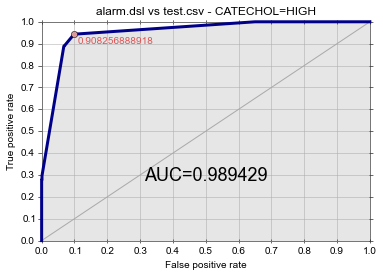

In [14]:
from gumLib.bn2roc import showROC
showROC(bn,"test.csv",
        variable='CATECHOL',label='HIGH',  # class and label 
        visible=True,show_fig=True)        

Using another class variable

test.csv : [ ################################################################ ] 100%
result in roc_alarm.dsl-test.csv-SAO2-HIGH.png


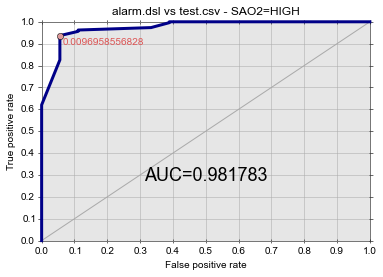

In [15]:
showROC(bn,"test.csv",'SAO2','HIGH',True,True)